# Ontario's Sunshine List (1996-2020)

Project Group 2:

- William Conley - 100782574
- Reese Dominguez - 100775764
- Alex Sawatzky - 100790274
- Joshua Trower - 100791683

## Introduction

### The Ontario Public Sector Safety Disclosure/Sunshine List

The [Ontario Public Sector Safety Disclosure](https://www.ontario.ca/page/public-sector-salary-disclosure#section-1), henceforth referred to as the **Sunshine List** for this notebook, started its collection in 1996 as a result of the **Public Sector Salary Disclosure Act** passed by the Government of Ontario. This act requires public service organizations to submit staff and salary information for all staff that earn more than \$100,000 during a calendar year by March of the year after, so as to make this data available to the public and to make public service organizations accountable for the use of the province's funding.

Although this is a positive step when it comes to transparency in the government level, the data does not show basic demographics such as gender and race, especially after the passing of the [Anti-Racism Act in 2017](https://news.ontario.ca/en/release/44976/ontario-passes-anti-racism-legislation). We want to explore any discrepancies in equity in gender and race regarding the public sector's highest paid employees.

We start by answering these basic questions, and then answering any other questions that appear as a result:

1. Which sector has the most people/largest budget?
2. What proportion of Sunshine Listers are women?
3. What proportion of Sunshine Listers are racialized?
4. How much of a change has there been since 1996?
5. Are any sectors improving in their racial/gender representation?

## Description of Data

As the Sunshine List has already been described in the introduction, we take this opportunity to introduce our auxiliary/helper datasets. Note that this has been taken almost verbatim from the descriptions in our proposal:

#### World Gender Name Dictionary
Link: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/MSEGSJ 

Citation: Raffo, Julio, 2021, "WGND 2.0", https://doi.org/10.7910/DVN/MSEGSJ, Harvard Dataverse, V1, UNF:6:5rI3h1mXzd6zkVhHurelLw== [fileUNF]

This data set is available on Harvard’s dataverse which is an archive of data that has been used in research and is made available for use by other researchers.  The data was compiled by Martinez, Lax, Raffo and Saito in 2016 as part of their research paper “Identifying the Gender of PCT Inventors.”  The author has compiled more than 26 million records and linked the given names from over 195 different countries and territories. Similar to the work of Raffo, this dataset will be used to explore the representation of women on the Sunshine List.  It is important to note that using a database of names to assign genders is an imprecise approach and in many cases may misattribute gender given how many names there are that are used by both genders (like Chris or Sam). However, since the sunshine list does not include gender in the datasets, it is hoped that this imprecise approach may still offer some value in the consideration of gender representation on the Sunshine list. This data has been made available as CCO – “Public Domain Dedication”.

#### Most Common Names Database
Link: https://raw.githubusercontent.com/fivethirtyeight/data/master/most-common-name/surnames.csv 

This data set is available on FiveThirtyEight's [Github (direct link)](https://github.com/fivethirtyeight/data/blob/master/most-common-name/). [FiveThirtyEight](https://fivethirtyeight.com/)  is a website devoted to using statistics to understand political, social and sporting trends.  The data is maintained by Andrew Flowers as part of the article “Dear Mona, What’s The Most Common Name in America?” article.  This data is a compilation of surnames from the US Census Bureau which includes the percentage of the population that identifies as White, Black, Asian, Hispanic and Multiple Races. It is important to note that determining racial identity solely by surname is an imprecise approach, given that each surname often has representation across all racial identities.  However, since the sunshine list does not include employee racial identity, it is hoped that this imprecise approach may still offer some value in consideration of the representative diversity on the Sunshine List.  This data has been made available under a Creative Commons Attribution 4.0 International License.

#### Ontario Demographics
Link: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/Page.cfm?Lang=E&Geo1=PR&Code1=35&Geo2=&Code2=&Data=Count&SearchText=Ontario&Sear

This dataset is maintained by Statistics Canada and provides provincial and national statistics on population demographics.  This will serve as a baseline to compare proportions and see if a group is over or under represented. The latest census publically available is that for 2016, as 2021's will be available in February 2022.

## Analysis of Data

We first import all the datasets we intend to use. For the Sunshine List, since we're working with 24 years' worth of work, we concatenate them all into one dataframe.

In [1]:
#importing used libraries
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt
import random

# seaborn
import seaborn as sns

In [2]:
# dataset import preparation
data_path = 'datasets/'
# reads CSV file, returns data in Python dict
# thanks Mariana ^^;

# to anyone else working on this: modify as needed.
def get_data_csv(path):
    collection = []
    with open(path, 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection

In [3]:
# dataset importing - sunshine lists

# because the "Salary Paid" column is formatted 
# differently for each list...
def format_sunshine(path):
    return (pd.DataFrame(get_data_csv(path))).rename(columns = {"Salary paid" : "Salary Paid",
                                                                "Salary Paid " : "Salary Paid",
                                                                "Surname": "Last Name",
                                                                "Last name": "Last Name",
                                                                "Position": "Job Title",
                                                                "Job title": "Job Title",
                                                                "Calendar year": "Calendar Year",
                                                                "First name": "First Name",
                                                                "Taxable benefits": "Taxable Benefits"})

# concatenating all into one df
df_sunshine = format_sunshine(data_path + 'sunshine1996.csv')
df_sunshine["Calendar Year"] = 1996

for yr in range(1997, 2021):
    # calling it a temp dataset because it'll be rewritten
    # w/ each loop
    curr_file = data_path + 'sunshine' + str(yr) + '.csv'
    df_temp = format_sunshine(curr_file)
    df_temp["Calendar Year"] = yr
    df_sunshine = pd.concat([df_sunshine, df_temp], ignore_index=True)

In [4]:
df_sunshine.drop(columns=[''], inplace=True)
# More fixing up formatting: 

# putting salary paid/taxable benefits into usable format
# taxable benefits commented as i don't know if we'll use it
# df_sunshine["Taxable Benefits"] = df_sunshine["Taxable Benefits"].replace('[\$,]', '', regex=True).astype(float)
df_sunshine["Salary Paid"] = df_sunshine["Salary Paid"].replace('[\$,]', '', regex=True).astype(float)

# changing all names/sectors to title case
df_sunshine["Sector"] = df_sunshine["Sector"].str.title()
df_sunshine["Last Name"] = df_sunshine["Last Name"].str.title()
df_sunshine["First Name"] = df_sunshine["First Name"].str.title()

# The Sunshine List

## Description of data attributes

This dataset contains all public sector employees who have been paid $100,000 or more for the calendar year.

- **Sector:** The government-controlled field that the employee works in
- **Last name:** The employee's last name
- **First name:** The employee's first name
- **Salary paid:** The amount of money the employee made in the calendar year
- **Taxable benefits:** Benefits added to the employee's income to determine tax deductions
- **Employer:** The organization/person the employee works in
- **Job title:** The employee's job or position
- **Calendar year:** The year this data was recorded in

A sample of the dataset is shown below.

In [5]:
# there may be more fixing to be done, but this is okay for now
df_sunshine

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Other Public Sector Employers,Kendall,Perry,194890.40,$711.24,Addiction Research Foundation,President & CEO,1996
1,Other Public Sector Employers,Rehm,Juergen,115603.62,$403.41,Addiction Research Foundation,"Dir., Soc. Eval. Research & Act. Dir., Clin. R...",1996
2,Other Public Sector Employers,Room,Robin,149434.48,$512.58,Addiction Research Foundation,"V.P., Research & Coordinator, Intern. Programs",1996
3,Ontario Public Service,Knox,Ken W,109382.92,"$4,921.68","Agriculture,Food and Rural Affairs",Deputy Minister,1996
4,Hospitals,Cliff,Bruce,110309.00,"$3,157.00",Ajax and Pickering General Hospital,President & CEO,1996
...,...,...,...,...,...,...,...,...
1676428,Universities,Zylberberg,Joel,141478.88,$727.20,York University,Assistant Professor / Canada Research Chair,2020
1676429,Universities,Zylla,Phil,127898.47,$231.93,McMaster Divinity College,Vice President Academic,2020
1676430,Universities,Zytaruk,Nicole,113582.77,$231.93,McMaster University,Research Associate,2020
1676431,Universities,Zytner,Richard,193168.37,"$1,906.08",University Of Guelph,Professor,2020


In [6]:
# importing the WGND
df_wgnd = pd.DataFrame(get_data_csv(data_path + 'wgnd.csv'))

# The World Gender Names Database

## Description of data attributes

This dataset contains all possible first names (in Latin characters), and the likelihood that a person with that name is that gender.

- **name:** A capitalized first name
- **gender:** The more likely gender the name is to be
- **probability:** The probability of the more likely gender

A sample of the dataset is shown below.

In [7]:
df_wgnd

,name,gender,probability
0,Aaban,M,1
1,Aabha,F,1
2,Aabid,M,1
3,Aabriella,F,1
4,Aada,F,1
...,...,...,...
95021,Zyvon,M,1
95022,Zyyanna,F,1
95023,Zyyon,M,1
95024,Zzyzx,M,1


In [8]:
# importing the MCND
df_mcnd = pd.DataFrame(get_data_csv(data_path + 'surnames.csv'))

# The Most Common Names Database

From FiveThirtyEight: "Data on surnames from the U.S. Census Bureau, including a breakdown by race/ethnicity."

## Description of data attributes

- **name:** A capitalized surname
- **rank:** The rank, based on `count`, of the surname
- **count:** The number of people in the US who have this surname
- **prop100k:** In a sample of 100,000 people, how many people are likely to have this surname?
- **cum_prop100k:** A sum of the surname's `prop100k` value with the values of those higher in rank 
- **pctwhite:** Percentage of white people with this surname
- **pctblack:** Percentage of black people with this surname
- **pctapi:** Percentage of Asian/Pacific Islander people with this surname
- **pctaian:** Percentage of Native American people with this surname
- **pct2prace:** Percentage of mixed-race people with this surname
- **pcthispanic:** Percentage of Hispanic people with this surname

A sample of the dataset is shown below.

In [9]:
df_mcnd.name = df_mcnd.name.str.title()

df_mcnd

,name,rank,count,prop100k,cum_prop100k,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic
0,Smith,1,2376206,880.85,880.85,73.35,22.22,0.4,0.85,1.63,1.56
1,Johnson,2,1857160,688.44,1569.3,61.55,33.8,0.42,0.91,1.82,1.5
2,Williams,3,1534042,568.66,2137.96,48.52,46.72,0.37,0.78,2.01,1.6
3,Brown,4,1380145,511.62,2649.58,60.71,34.54,0.41,0.83,1.86,1.64
4,Jones,5,1362755,505.17,3154.75,57.69,37.73,0.35,0.94,1.85,1.44
...,...,...,...,...,...,...,...,...,...,...,...
151666,Yousko,150436,100,0.04,89752.93,99,(S),0,0,0,(S)
151667,Zaitsev,150436,100,0.04,89753.04,92,(S),0,0,7,(S)
151668,Zalla,150436,100,0.04,89753.11,99,(S),0,0,0,(S)
151669,Zerbey,150436,100,0.04,89753.3,99,(S),0,0,0,(S)


In [10]:
# importing the Ontario census
df_census = pd.read_csv(data_path + 'census2016.csv')
df_census.drop(df_census.index[range(2249,2782)],  inplace=True) # there are 600 lines worth of notes alone.
df_census.reset_index(inplace=True)
df_census.fillna('-',inplace=True)

# The Census

A dataset that contains a lot of data about the demographics of Canadian residents, more specifically, in this case, residents of Ontario.

## Description of data attributes

There are too many fields to take into account, so we list the topics:

In [11]:
df_census.level_0.unique()

array(['Topic', '-', 'Population and dwellings', 'Age characteristics',
       'Household and dwelling characteristics', 'Marital status',
       'Family characteristics', 'Household type',
       'Knowledge of official languages',
       'First official language spoken', 'Mother tongue',
       'Language spoken most often at home',
       'Other language spoken regularly at home',
       'Income of individuals in 2015', 'Income of households in 2015',
       'Income of economic families in 2015', 'Low income in 2015',
       'Knowledge of languages', 'Citizenship',
       'Immigrant status and period of immigration', 'Age at immigration',
       'Immigrants by selected place of birth',
       'Recent immigrants by selected places of birth',
       'Generation status', 'Admission category and applicant type',
       'Aboriginal population', 'Visible minority population',
       'Ethnic origin population', 'Household characteristics',
       ' Highest certificate; diploma or degree',
  

As shown, there are many topics that are covered, mainly of living situation, the family in a living situation, knowledge of languages, whether a person is at school or at work or both, and if the resident has moved in the past year/5 years. 

The number of people who respond a certain way is split into 3 values: a total for all residents, one for exclusively male residents, and one for exclusively female residents.

A sample of the dataset is shown below.

In [12]:
df_census

,level_0,level_1,level_2,level_3,level_4,Unnamed: 0,Unnamed: 1,Unnamed: 2,Ontario [Province],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Canada [Country]
0,Topic,Characteristics,Note,Total,Flag_Total,Male,Flag_Male,Female,Flag_Female,Total,Flag_Total,Male,Flag_Male,Female,Flag_Female
1,-,-,-,Counts (unless otherwise specified),-,-,-,-,-,-,-,-,-,-,-
2,Population and dwellings,Population; 2016,1,13448494,-,-,...,-,...,35151728,-,-,...,-,...
3,Population and dwellings,Population; 2011,1,12851821,-,-,...,-,...,33476688,-,-,...,-,...
4,Population and dwellings,Population percentage change; 2011 to 2016,-,4.6,-,-,...,-,...,5.0,-,-,...,-,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,Mobility status - Place of residence 5 years ago,Migrants,-,2112340,-,1032710,-,1079630,-,5678175,-,2786945,-,2891230,-
2245,Mobility status - Place of residence 5 years ago,Internal migrants,-,1562375,-,761630,-,800740,-,4296720,-,2104325,-,2192395,-
2246,Mobility status - Place of residence 5 years ago,Intraprovincial migrants,-,1380900,-,672540,-,708360,-,3467670,-,1689950,-,1777720,-
2247,Mobility status - Place of residence 5 years ago,Interprovincial migrants,-,181480,-,89090,-,92390,-,829045,-,414375,-,414670,-


In [13]:
def create_census(df_old, range_list):
    df = df_old.iloc[:, range_list]
    df.columns = df.iloc[0]
    df = df[2:].reset_index(drop=True)
    df.drop(columns=['Note', 'Flag_Total', 'Flag_Male', 'Flag_Female'], inplace=True)
    df = df.set_index(['Topic', 'Characteristics'])
    
    return df

In [14]:
# the dataset looks like a mess, so we reshape it

# splitting it into province
df_census_on = create_census(df_census, range(9))

df_census_on

0                                                                                                   Total  \
Topic                                            Characteristics                                            
Population and dwellings                         Population; 2016                                13448494   
                                                 Population; 2011                                12851821   
                                                 Population percentage change; 2011 to 2016           4.6   
                                                 Total private dwellings                          5598391   
                                                 Private dwellings occupied by usual residents    5169174   
...                                                                                                   ...   
Mobility status - Place of residence 5 years ago     Migrants                                     2112340   
                                                       Internal migrants                          1562375   
                                                         Intraprovincial migrants                 1380900   
                                                         Interprovincial migrants                  181480   
                                                       External migrants                           549965   

0                                                                                                   Male  \
Topic                                            Characteristics                                           
Population and dwellings                         Population; 2016                                      -   
                                                 Population; 2011                                      -   
                                                 Population percentage change; 2011 to 2016            -   
                                                 Total private dwellings                               -   
                                                 Private dwellings occupied by usual residents         -   
...                                                                                                  ...   
Mobility status - Place of residence 5 years ago     Migrants                                    1032710   
                                                       Internal migrants                          761630   
                                                         Intraprovincial migrants                 672540   
                                                         Interprovincial migrants                  89090   
                                                       External migrants                          271080   

0                                                                                                 Female  
Topic                                            Characteristics                                          
Population and dwellings                         Population; 2016                                      -  
                                                 Population; 2011                                      -  
                                                 Population percentage change; 2011 to 2016            -  
                                                 Total private dwellings                               -  
                                                 Private dwellings occupied by usual residents         -  
...                                                                                                  ...  
Mobility status - Place of residence 5 years ago     Migrants                                    1079630  
                                                       Internal migrants                          800740  
                                                         Intraprovincial migrants                 708360  


In [15]:
col_count = list(range(3)) + list(range(9,len(df_census.columns)))

# then country
df_census_ca = create_census(df_census, col_count)

df_census_ca

0                                                                                                   Total  \
Topic                                            Characteristics                                            
Population and dwellings                         Population; 2016                                35151728   
                                                 Population; 2011                                33476688   
                                                 Population percentage change; 2011 to 2016           5.0   
                                                 Total private dwellings                         15412443   
                                                 Private dwellings occupied by usual residents   14072079   
...                                                                                                   ...   
Mobility status - Place of residence 5 years ago     Migrants                                     5678175   
                                                       Internal migrants                          4296720   
                                                         Intraprovincial migrants                 3467670   
                                                         Interprovincial migrants                  829045   
                                                       External migrants                          1381460   

0                                                                                                   Male  \
Topic                                            Characteristics                                           
Population and dwellings                         Population; 2016                                      -   
                                                 Population; 2011                                      -   
                                                 Population percentage change; 2011 to 2016            -   
                                                 Total private dwellings                               -   
                                                 Private dwellings occupied by usual residents         -   
...                                                                                                  ...   
Mobility status - Place of residence 5 years ago     Migrants                                    2786945   
                                                       Internal migrants                         2104325   
                                                         Intraprovincial migrants                1689950   
                                                         Interprovincial migrants                 414375   
                                                       External migrants                          682625   

0                                                                                                 Female  
Topic                                            Characteristics                                          
Population and dwellings                         Population; 2016                                      -  
                                                 Population; 2011                                      -  
                                                 Population percentage change; 2011 to 2016            -  
                                                 Total private dwellings                               -  
                                                 Private dwellings occupied by usual residents         -  
...                                                                                                  ...  
Mobility status - Place of residence 5 years ago     Migrants                                    2891230  
                                                       Internal migrants                         2192395  
                                                         Intraprovincial migrants                1777720  


## 2.0 Overall Change Over Time

In [16]:
# Function to assign gender to a given name based on probability
def predict_gender(name):
    try:
        entry = df_wgnd.loc[df_wgnd['name'] == name]
        guess = random.random()
        if guess <= float(entry["probability"]):
            return entry["gender"]
        else:
            if entry["gender"] == "M":
                return "F"
            else:
                return "M"
    except TypeError as e:
        return np.nan

predict_gender("William")

91091    M
Name: gender, dtype: object

### 2.1 Change In Number of People Over Time

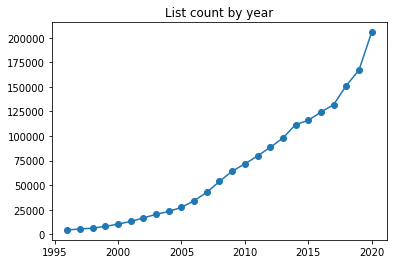

In [17]:
# Make a dataframe of the years and numbers of entries
all_count = df_sunshine.groupby("Calendar Year").size().sort_values().reset_index()
all_count.columns = ["Year", "Count"]
all_count = all_count.astype(int)
all_count

# Plot a line graph that shows the number of entries per year
plt.plot(all_count["Year"], all_count["Count"], marker="o")
plt.title("List count by year")
plt.show()

### 2.2 Change in Salary Over Time

Salary Paid                              \
Sector             Colleges    Colleges  Crown Agencies   
Calendar Year                                             
1996           4.582578e+06          NaN   7.111010e+07   
1997           4.564770e+06          NaN   1.285085e+08   
1998           5.892958e+06          NaN   2.178547e+08   
1999           8.819662e+06          NaN   7.821683e+07   
2000           1.188158e+07          NaN   1.109932e+08   
2001           1.697995e+07          NaN   1.544158e+08   
2002           2.521901e+07          NaN   1.618111e+08   
2003           3.500753e+07          NaN   1.757442e+08   
2004           4.848115e+07          NaN   1.689107e+08   
2005           5.765022e+07          NaN   2.055176e+08   
2006           7.869076e+07          NaN   2.539936e+08   
2007           9.761862e+07          NaN   2.815802e+08   
2008           1.362619e+08          NaN   3.673612e+08   
2009           2.318944e+08          NaN   4.056254e+08   
2010           2.565809e+08          NaN   4.095464e+08   
2011           3.969844e+08          NaN   3.985131e+08   
2012           4.506654e+08          NaN   4.363518e+08   
2013           4.728522e+08          NaN   4.665549e+08   
2014           5.250545e+08          NaN   5.269323e+08   
2015           5.565848e+08          NaN   5.827675e+08   
2016           6.123252e+08          NaN   6.373661e+08   
2017           2.896335e+08          NaN   7.751916e+08   
2018                    NaN  767296840.4   8.642853e+08   
2019           8.090380e+08          NaN   9.288541e+08   
2020           9.021030e+08          NaN   1.229629e+09   

                                                 \
Sector        Government Of Ontario - Judiciary   
Calendar Year                                     
1996                                        NaN   
1997                                        NaN   
1998                                        NaN   
1999                                        NaN   
2000                                        NaN   
2001                                        NaN   
2002                                        NaN   
2003                                        NaN   
2004                                        NaN   
2005                                        NaN   
2006                                        NaN   
2007                                        NaN   
2008                                        NaN   
2009                                        NaN   
2010                                        NaN   
2011                                        NaN   
2012                               1.176680e+08   
2013                               1.204564e+08   
2014                               1.258305e+08   
2015                               1.226736e+08   
2016                               1.268999e+08   
2017                               1.270969e+08   
2018                               1.334210e+08   
2019                               1.385232e+08   
2020                                        NaN   

                                                                      \
Sector        Government Of Ontario - Legislative Assembly & Offices   
Calendar Year                                                          
1996                                                         NaN       
1997                                                         NaN       
1998                                                         NaN       
1999                                                         NaN       
2000                                                         NaN       
2001                                                         NaN       
2002                                                         NaN       
2003                                                         NaN       
2004                                                         NaN       
2005                                                         NaN      

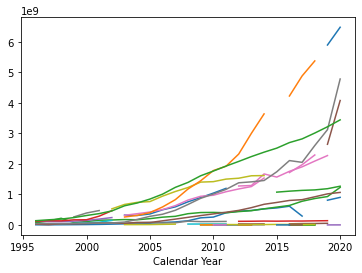

In [27]:
# Make a datframe of the years and sectors
all_pay = df_sunshine.groupby(["Calendar Year", "Sector"]).sum().unstack()
all_pay.plot(legend=False)
all_pay

## Potential Data Science

## Conclusion